In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/8/train_dataset8.npz"
val = "Data/readelf/8/val_dataset8.npz"
test = "Data/readelf/8/test_dataset8.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x'][:1148]
y_train = training_dataset['y'][:1148]

x_val = val_dataset['x']
y_val = val_dataset['y']

x_test = test_dataset['x']
y_test = test_dataset['y']

print("No. of seed files collected: 68")
print("Data collection of XY simulated to 1% sampling rate, Dataset split: 60/4/4")
samples, timesteps, chunksize = x_train.shape
print("No. of samples: " + str(samples) + ", No. of timesteps: " + str(timesteps) + ", Chunksize: " + str(chunksize))
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of seed files collected: 68
Data collection of XY simulated to 1% sampling rate, Dataset split: 60/4/4
No. of samples: 1148, No. of timesteps: 3840, Chunksize: 64
Training shape:  (1148, 3840, 64) (1148, 3840, 64)
Validation shape:  (82, 3840, 64) (82, 3840, 64)
Test shape:  (104, 3840, 64) (104, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(3840, 64), return_sequences=True))
model.add(Activation('sigmoid'))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error')

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=41,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3840, 64)          33024     
_________________________________________________________________
activation_1 (Activation)    (None, 3840, 64)          0         
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 1148 samples, validate on 82 samples
Epoch 1/200
1148/1148 [==============================] - 156s 136ms/step - loss: 0.4972 - val_loss: 0.4977
Epoch 2/200
1148/1148 [==============================] - 154s 134ms/step - loss: 0.4940 - val_loss: 0.4958
Epoch 3/200
1148/1148 [==============================] - 157s 137ms/step - loss: 0.4904 - val_loss: 0.4936
Epoch 4/200
1148/1148 [==============================] - 157s 137ms/step - loss: 0.4859 - val_loss: 0.4907
Epoch 5/200
1148/1148 [==============================] - 157

Epoch 71/200
1148/1148 [==============================] - 150s 131ms/step - loss: 0.2900 - val_loss: 0.2821
Epoch 72/200
1148/1148 [==============================] - 149s 130ms/step - loss: 0.2900 - val_loss: 0.2821
Epoch 73/200
1148/1148 [==============================] - 148s 129ms/step - loss: 0.2900 - val_loss: 0.2821
Epoch 74/200
1148/1148 [==============================] - 150s 131ms/step - loss: 0.2899 - val_loss: 0.2821
Epoch 75/200
1148/1148 [==============================] - 149s 130ms/step - loss: 0.2899 - val_loss: 0.2821
Epoch 76/200
1148/1148 [==============================] - 148s 129ms/step - loss: 0.2899 - val_loss: 0.2821
Epoch 77/200
1148/1148 [==============================] - 149s 130ms/step - loss: 0.2899 - val_loss: 0.2821
Epoch 78/200
1148/1148 [==============================] - 152s 132ms/step - loss: 0.2899 - val_loss: 0.2821
Epoch 79/200
1148/1148 [==============================] - 151s 131ms/step - loss: 0.2899 - val_loss: 0.2821
Epoch 80/200
1148/1148 [====

1148/1148 [==============================] - 151s 131ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 147/200
1148/1148 [==============================] - 151s 132ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 148/200
1148/1148 [==============================] - 151s 131ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 149/200
1148/1148 [==============================] - 151s 131ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 150/200
1148/1148 [==============================] - 152s 132ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 151/200
1148/1148 [==============================] - 151s 132ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 152/200
1148/1148 [==============================] - 151s 131ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 153/200
1148/1148 [==============================] - 151s 132ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 154/200
1148/1148 [==============================] - 150s 131ms/step - loss: 0.2898 - val_loss: 0.2820
Epoch 155/200
1148/1148 [========

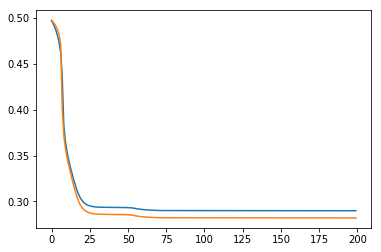

In [3]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [4]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

104/104 [==============================] - 4s 42ms/step
Test loss: 0.28574026089448196


In [5]:
model.save("/home/isa/FYPJ/Model/model8_2.h5")

In [6]:
x_predict = test_dataset['x'][:1]
predictions = model.predict(x_predict)
print(predictions[0][0]) # 1
print(predictions[0][1]) # 2 (1st row)
print(predictions[0][2]) # 1
print(predictions[0][3]) # 2 (2nd row)
print(predictions[0][4]) # 1
print(predictions[0][5]) # 2 (3rd row)
print(predictions[0][6]) # 1
print(predictions[0][7]) # 2 (4th row)
print(predictions[0][8]) # 1
print(predictions[0][9]) # 2 (5th row)
print(predictions[0][10])# 1
print(predictions[0][11])# 2 (6th row)
print(predictions[0][12])# 1
print(predictions[0][13])# 2 (7th row)
print(predictions[0][14])# 1
print(predictions[0][15])# 2 (8th row)
print(predictions[0][788])# 1
print(predictions[0][789])# 2 (OFFSET 0xC50)

[0.46026632 0.44264427 0.39014342 0.40442243 0.41143885 0.43361333
 0.4200494  0.42916384 0.4222737  0.38678864 0.43080163 0.411844
 0.41896376 0.43146744 0.4155897  0.46425533 0.40230793 0.41974735
 0.41565102 0.45346117 0.40833646 0.43215743 0.43942034 0.48479968
 0.4393999  0.41659117 0.50681406 0.44388688 0.43448523 0.40944767
 0.42888308 0.44309515 0.39096662 0.46406403 0.40209875 0.42784292
 0.40910843 0.46105662 0.43134883 0.43771157 0.487213   0.48481238
 0.41641414 0.44520605 0.42258924 0.4034257  0.4290756  0.40982604
 0.40389735 0.40516776 0.41301137 0.37367314 0.39858127 0.4099515
 0.39445227 0.41254142 0.41597903 0.4652351  0.40414697 0.42036358
 0.48156136 0.5609727  0.4218799  0.40377125]
[0.4369539  0.41306028 0.37526998 0.3888559  0.4049546  0.4138789
 0.40142173 0.4146559  0.39161655 0.38248056 0.4007835  0.4029619
 0.39721724 0.396877   0.39231235 0.43475905 0.38268292 0.40121138
 0.40590516 0.41760722 0.39531553 0.411126   0.4235892  0.44245404
 0.43396956 0.3962434